In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip3 install xgboost
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [2]:
data_train = pd.read_csv(r'C:\Users\Mugdha\Music\GCDAI_9th May 2021\World_Happiness_Report\train_data.csv')

In [3]:
print('Shape of Train Dataset: ', data_train.shape)
data_train.head()

Shape of Train Dataset:  (1559, 12)


,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
0,Jordan,2008,9.343,0.766,64.22,NaN,-0.127,0.709,0.669,0.331,862,4.930
1,Estonia,2013,10.299,0.901,67.48,0.754,-0.201,0.726,0.702,0.199,534,5.367
2,Sweden,2018,10.881,0.931,72.60,0.942,0.077,0.263,0.823,0.161,1649,7.375
3,Tajikistan,2006,7.554,0.724,60.64,0.702,-0.088,0.768,0.566,0.195,1682,4.613
4,Kuwait,2014,10.945,NaN,65.80,NaN,NaN,NaN,NaN,NaN,925,6.180


In [4]:
data_train.columns

Index(['Country name', 'year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'ID', 'Life Ladder'],
      dtype='object')

In [5]:
data_train.describe()

,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID,Life Ladder
count,1559.000000,1533.000000,1549.000000,1522.000000,1537.000000,1488.000000,1473.000000,1542.000000,1545.000000,1559.000000,1559.000000
mean,2013.131495,9.362995,0.812689,63.331680,0.741882,0.000343,0.748248,0.708551,0.267644,974.962797,5.469321
std,4.206026,1.160240,0.118762,7.478307,0.142326,0.163385,0.186708,0.108029,0.084431,562.023107,1.113280
min,2005.000000,6.635000,0.290000,32.300000,0.260000,-0.335000,0.035000,0.322000,0.083000,0.000000,2.375000
25%,2010.000000,8.460000,0.753000,58.340000,0.646000,-0.113000,0.691000,0.623000,0.206000,494.500000,4.649500
50%,2013.000000,9.456000,0.835000,65.180000,0.763000,-0.025000,0.804000,0.721000,0.258000,973.000000,5.374000
75%,2017.000000,10.332000,0.905000,68.535000,0.855000,0.091000,0.873000,0.798000,0.319000,1459.500000,6.272500
max,2020.000000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000,1948.000000,8.019000


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1559 entries, 0 to 1558
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1559 non-null   object 
 1   year                              1559 non-null   int64  
 2   Log GDP per capita                1533 non-null   float64
 3   Social support                    1549 non-null   float64
 4   Healthy life expectancy at birth  1522 non-null   float64
 5   Freedom to make life choices      1537 non-null   float64
 6   Generosity                        1488 non-null   float64
 7   Perceptions of corruption         1473 non-null   float64
 8   Positive affect                   1542 non-null   float64
 9   Negative affect                   1545 non-null   float64
 10  ID                                1559 non-null   int64  
 11  Life Ladder                       1559 non-null   float64
dtypes: flo

In [7]:
data_train.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  26
Social support                      10
Healthy life expectancy at birth    37
Freedom to make life choices        22
Generosity                          71
Perceptions of corruption           86
Positive affect                     17
Negative affect                     14
ID                                   0
Life Ladder                          0
dtype: int64

In [8]:
print('Duplicated values in the Trained Dataset: ',data_train.duplicated().any())    

Duplicated values in the Trained Dataset:  False


In [9]:
# Handling Missing values 
data_train['Log GDP per capita'] = data_train['Log GDP per capita'].fillna(data_train['Log GDP per capita'].mean())
data_train['Social support'] = data_train['Social support'].fillna(data_train['Social support'].mean())
data_train['Healthy life expectancy at birth'] = data_train['Healthy life expectancy at birth'].fillna(data_train['Healthy life expectancy at birth'].mean())
data_train['Freedom to make life choices'] = data_train['Freedom to make life choices'].fillna(data_train['Freedom to make life choices'].mean())
data_train['Generosity'] = data_train['Generosity'].fillna(data_train['Generosity'].mean())
data_train['Perceptions of corruption'] = data_train['Perceptions of corruption'].fillna(data_train['Perceptions of corruption'].mean())
data_train['Positive affect'] = data_train['Positive affect'].fillna(data_train['Positive affect'].mean())
data_train['Negative affect'] = data_train['Negative affect'].fillna(data_train['Negative affect'].mean())

In [10]:
data_train.isnull().sum()

Country name                        0
year                                0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
ID                                  0
Life Ladder                         0
dtype: int64

<AxesSubplot:>

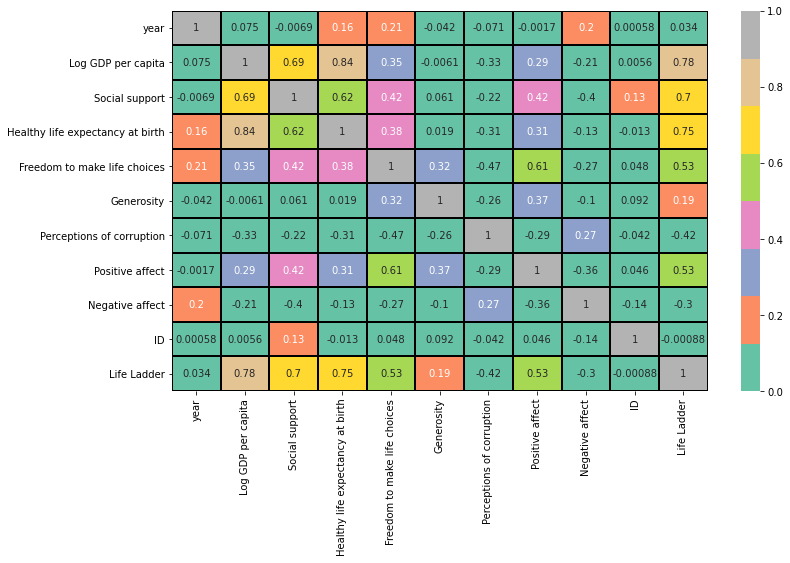

In [11]:
figure = plt.figure(figsize = (12,7))
sns.heatmap(data = data_train.corr(), annot = True, cmap = 'Set2',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)

<AxesSubplot:xlabel='Life Ladder', ylabel='Density'>

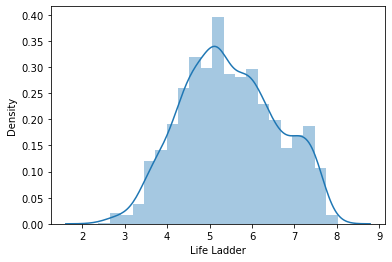

In [12]:
sns.distplot(data_train['Life Ladder'], kde = True)

## Observations:-
- Shape of the dataset : 1559 rows and 12 features
- The dataset contains happiness records from total 165 countries.
- Total 11 Features are integer/float.
- Highest positive correlation between Healthy life expectancy at birth and Log GDP per capita
- Dataset has Missing values which are taken care now.
- Standard Deviation of dependent variabe : 1.11
- Target variable 'Life_Ladder' is Positively Skewed

In [13]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [14]:
df_num = data_train.select_dtypes(include = ['int64','float64'])
df_cat = data_train.drop(df_num, axis = 1)

In [15]:
df_cat = df_cat.apply(le.fit_transform)

In [16]:
data = pd.concat([df_num, df_cat], axis = 1)

In [17]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   year                              5 non-null      int64  
 1   Log GDP per capita                5 non-null      float64
 2   Social support                    5 non-null      float64
 3   Healthy life expectancy at birth  5 non-null      float64
 4   Freedom to make life choices      5 non-null      float64
 5   Generosity                        5 non-null      float64
 6   Perceptions of corruption         5 non-null      float64
 7   Positive affect                   5 non-null      float64
 8   Negative affect                   5 non-null      float64
 9   ID                                5 non-null      int64  
 10  Life Ladder                       5 non-null      float64
 11  Country name                      5 non-null      int32  
dtypes: float64(9

In [18]:
data = data[['Country name','year','Log GDP per capita','Social support','Healthy life expectancy at birth',
            'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect',
            'Negative affect','ID','Life Ladder']]

In [19]:
data.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      5 non-null      int32  
 1   year                              5 non-null      int64  
 2   Log GDP per capita                5 non-null      float64
 3   Social support                    5 non-null      float64
 4   Healthy life expectancy at birth  5 non-null      float64
 5   Freedom to make life choices      5 non-null      float64
 6   Generosity                        5 non-null      float64
 7   Perceptions of corruption         5 non-null      float64
 8   Positive affect                   5 non-null      float64
 9   Negative affect                   5 non-null      float64
 10  ID                                5 non-null      int64  
 11  Life Ladder                       5 non-null      float64
dtypes: float64(9

In [20]:
data_features = data.drop(['Life Ladder'], axis = 1)
data_target = data['Life Ladder']

In [21]:
print('Shape of Train data_features: ',data_features.shape)
print('Shape of Train data_target: ',data_target.shape)

Shape of Train data_features:  (1559, 11)
Shape of Train data_target:  (1559,)


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size = 0.2, random_state = 4)

In [24]:
print('Shape of x train: ', X_train.shape)
print('Shape of x test: ', X_test.shape)
print('Shape of y train: ', y_train.shape)
print('Shape of y test: ', y_test.shape)

Shape of x train:  (1247, 11)
Shape of x test:  (312, 11)
Shape of y train:  (1247,)
Shape of y test:  (312,)


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
numeric_features = X_train[['Log GDP per capita', 'Healthy life expectancy at birth']].columns
numeric_features

Index(['Log GDP per capita', 'Healthy life expectancy at birth'], dtype='object')

In [27]:
X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])

In [28]:
X_test[numeric_features] = sc.transform(X_test[numeric_features])

In [29]:
X_train.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
772,107,2014,-2.034411,0.753,-1.597299,0.688,-0.046000,0.605,0.678,0.205,1261
786,97,2012,-0.181627,0.919,-0.333302,0.688,0.107000,0.932,0.689,0.181,1142
1358,107,2019,-1.965725,0.677,-1.255532,0.831,0.026000,0.729,0.816,0.304,1266
1313,127,2019,-1.667506,0.611,-1.472527,0.718,0.074000,0.874,0.513,0.438,1520
759,95,2005,0.366123,0.903,0.399056,0.814,0.000343,0.764,0.820,0.219,1108


In [30]:
X_test.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
276,39,2014,1.299905,0.956,1.088016,0.942000,0.118000,0.237000,0.832,0.233,457
875,2,2014,-0.027735,0.818,0.255297,0.741882,0.000343,0.748248,0.626,0.177,28
1021,59,2017,-0.645909,0.843,0.507554,0.898000,0.072000,0.783000,0.842,0.248,696
326,16,2007,-0.567659,0.796,-0.509611,0.780000,0.001000,0.817000,0.771,0.388,179
1312,38,2012,0.920828,0.912,0.694712,0.740000,-0.154000,0.957000,0.609,0.257,441


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor

In [32]:
lr= LinearRegression()
d_tree = DecisionTreeRegressor(max_leaf_nodes=10, max_features= "sqrt", max_depth=12, min_samples_split=5, min_samples_leaf=4)
rfr= RandomForestRegressor(n_estimators = 20, random_state = 4)
knn = KNeighborsRegressor(n_neighbors = 3)
svc = SVC(random_state=101)
xgb = XGBRegressor(random_state=101)
ab = AdaBoostRegressor(n_estimators=50, random_state=101)
gb = GradientBoostingRegressor(random_state=101)

In [33]:
print('Linear Regression: ', lr.fit(X_train, y_train))
print('Decision Tree: ', d_tree.fit(X_train, y_train))
print('Random Forest: ', rfr.fit(X_train, y_train))
print('KNN: ', knn.fit(X_train, y_train))
#print('SVC: ', svc.fit(X_train, y_train))
print('XGB: ', xgb.fit(X_train, y_train))
print('AdaB: ', ab.fit(X_train, y_train))
print('GB: ', gb.fit(X_train, y_train))

Linear Regression:  LinearRegression()
Decision Tree:  DecisionTreeRegressor(max_depth=12, max_features='sqrt', max_leaf_nodes=10,
                      min_samples_leaf=4, min_samples_split=5)
Random Forest:  RandomForestRegressor(n_estimators=20, random_state=4)
KNN:  KNeighborsRegressor(n_neighbors=3)
XGB:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
AdaB:  AdaBoostRegressor(random_state=101)
GB:  GradientB

In [34]:
pred_lr = lr.predict(X_train)
pred_dt = d_tree.predict(X_train)
pred_rf = rfr.predict(X_train)
pred_knn = knn.predict(X_train)
pred_xgb = xgb.predict(X_train)
pred_ab = ab.predict(X_train)
pred_gb = gb.predict(X_train)

## Training with Linear Regression

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [36]:
r2_score_LR = r2_score(y_train, pred_lr)
mse_score_LR = mean_squared_error(y_train, pred_lr)
mae_score_LR = mean_absolute_error(y_train, pred_lr)
rmse_LR = mean_squared_error(y_train, pred_lr, squared=False)

In [37]:
print('Linear Regression: ')
print('R2 score: ', r2_score_LR)
print('MSE Score: ', mse_score_LR)
print('MAE Score: ', mae_score_LR)
print('RMSE Score: ', rmse_LR)

Linear Regression: 
R2 score:  0.7654511115906936
MSE Score:  0.292092171822401
MAE Score:  0.41988119802081453
RMSE Score:  0.5404555225200321


## Training with Decision Tree

In [38]:
r2_score_DT = r2_score(y_train, pred_dt)
mse_score_DT = mean_squared_error(y_train, pred_dt)
mae_score_DT = mean_absolute_error(y_train, pred_dt)
rmse_DT = mean_squared_error(y_train, pred_dt, squared=False)

In [39]:
print('Decision Tree: ')
print('R2 score: ', r2_score_DT)
print('MSE Score: ', mse_score_DT)
print('MAE Score: ', mae_score_DT)
print('RMSE Score: ', rmse_DT)

Decision Tree: 
R2 score:  0.7598961885037826
MSE Score:  0.29900991745644023
MAE Score:  0.43642653249566965
RMSE Score:  0.5468179929889289


## Training with Random Forest

In [40]:
r2_score_RF = r2_score(y_train, pred_rf)
mse_score_RF = mean_squared_error(y_train, pred_rf)
mae_score_RF = mean_absolute_error(y_train, pred_rf)
rmse_RF = mean_squared_error(y_train, pred_rf, squared=False)

In [41]:
print('Random Forest: ')
print('R2 score: ', r2_score_RF)
print('MSE Score: ', mse_score_RF)
print('MAE Score: ', mae_score_RF)
print('RMSE Score: ', rmse_RF)

Random Forest: 
R2 score:  0.9786771984909312
MSE Score:  0.026554052097032883
MAE Score:  0.11805797914995995
RMSE Score:  0.16295414108586773


## Training with KNN

In [42]:
r2_score_KNN = r2_score(y_train, pred_knn)
mse_score_KNN = mean_squared_error(y_train, pred_knn)
mae_score_KNN = mean_absolute_error(y_train, pred_knn)
rmse_KNN = mean_squared_error(y_train, pred_knn, squared=False)

In [43]:
print('KNN: ')
print('R2 score: ', r2_score_KNN)
print('MSE Score: ', mse_score_KNN)
print('MAE Score: ', mae_score_KNN)
print('RMSE Score: ', rmse_KNN)

KNN: 
R2 score:  0.9425440640828974
MSE Score:  0.07155194475630404
MAE Score:  0.1833675487837477
RMSE Score:  0.26749195269447645


## Training with XG Booster

In [44]:
r2_score_XGB = r2_score(y_train, pred_xgb)
mse_score_XGB = mean_squared_error(y_train, pred_xgb)
mae_score_XGB = mean_absolute_error(y_train, pred_xgb)
rmse_XGB = mean_squared_error(y_train, pred_xgb, squared=False)

In [45]:
print('XG Booster: ')
print('R2 score: ', r2_score_XGB)
print('MSE Score: ', mse_score_XGB)
print('MAE Score: ', mae_score_XGB)
print('RMSE Score: ', rmse_XGB)

XG Booster: 
R2 score:  0.9989712545439843
MSE Score:  0.001281133739485886
MAE Score:  0.02506761607802573
RMSE Score:  0.035792928624043686


## Treaining with ADA Booster

In [46]:
r2_score_ADAB = r2_score(y_train, pred_ab)
mse_score_ADAB = mean_squared_error(y_train, pred_ab)
mae_score_ADAB = mean_absolute_error(y_train, pred_ab)
rmse_ADAB = mean_squared_error(y_train, pred_ab, squared=False)

In [47]:
print('ADA Booster: ')
print('R2 score: ', r2_score_ADAB)
print('MSE Score: ', mse_score_ADAB)
print('MAE Score: ', mae_score_ADAB)
print('RMSE Score: ', rmse_ADAB)

ADA Booster: 
R2 score:  0.8227577690798955
MSE Score:  0.22072612886468346
MAE Score:  0.3888311495965862
RMSE Score:  0.4698149942952901


## Training with Gradient Booster

In [48]:
r2_score_GB = r2_score(y_train, pred_gb)
mse_score_GB = mean_squared_error(y_train, pred_gb)
mae_score_GB = mean_absolute_error(y_train, pred_gb)
rmse_GB = mean_squared_error(y_train, pred_gb, squared=False)

In [49]:
print('Gradient Booster: ')
print('R2 score: ', r2_score_GB)
print('MSE Score: ', mse_score_GB)
print('MAE Score: ', mae_score_GB)
print('RMSE Score: ', rmse_GB)

Gradient Booster: 
R2 score:  0.9036583969268301
MSE Score:  0.11997766550650305
MAE Score:  0.26833186635158485
RMSE Score:  0.3463779229490573


## Working on Test Dataset

In [50]:
test_data = pd.read_csv(r'C:\Users\Mugdha\Music\GCDAI_9th May 2021\World_Happiness_Report\test_data.csv')

In [51]:
print('Shape of the Test dataset: ', test_data.shape)
test_data

Shape of the Test dataset:  (390, 11)


,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,Spain,2020,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317,1614
1,Poland,2017,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203,1405
2,Lebanon,2012,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339,974
3,Malaysia,2011,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155,1055
4,Canada,2020,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307,307
...,...,...,...,...,...,...,...,...,...,...,...
385,Germany,2018,10.890,0.920,72.20,0.877,0.034,0.496,0.780,0.243,618
386,Cyprus,2010,10.551,0.822,72.40,0.755,0.073,0.833,0.786,0.296,426
387,Latvia,2019,10.336,0.936,67.10,0.698,-0.194,0.789,0.575,0.212,966
388,Japan,2010,10.532,0.902,73.80,0.772,-0.140,0.770,0.827,0.188,849


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      390 non-null    object 
 1   year                              390 non-null    int64  
 2   Log GDP per capita                380 non-null    float64
 3   Social support                    387 non-null    float64
 4   Healthy life expectancy at birth  372 non-null    float64
 5   Freedom to make life choices      380 non-null    float64
 6   Generosity                        372 non-null    float64
 7   Perceptions of corruption         366 non-null    float64
 8   Positive affect                   385 non-null    float64
 9   Negative affect                   388 non-null    float64
 10  ID                                390 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 33.6+ KB


In [53]:
test_data.isnull().sum()

Country name                         0
year                                 0
Log GDP per capita                  10
Social support                       3
Healthy life expectancy at birth    18
Freedom to make life choices        10
Generosity                          18
Perceptions of corruption           24
Positive affect                      5
Negative affect                      2
ID                                   0
dtype: int64

In [54]:
print('Duplicated values in the test dataset: ', test_data.duplicated().any())

Duplicated values in the test dataset:  False


In [55]:
test_data.columns

Index(['Country name', 'year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect', 'ID'],
      dtype='object')

## Label Encoding (Handling Categorical Data) 

In [56]:
df_num1 = test_data.select_dtypes(include = ['int64','float64'])
df_cat1 = test_data.drop(df_num1, axis = 1)

In [57]:
df_cat1 = df_cat1.apply(le.fit_transform)

In [58]:
test_data = pd.concat([df_num1, df_cat1], axis = 1)

In [59]:
test_data = test_data[['Country name','year','Log GDP per capita','Social support','Healthy life expectancy at birth',
            'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect',
            'Negative affect','ID']]

In [60]:
test_data.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,114,2020,10.488,0.935,75.00,0.783,-0.121,0.730,0.686,0.317,1614
1,98,2017,10.314,0.882,68.90,0.831,-0.122,0.639,0.677,0.203,1405
2,67,2012,9.800,0.713,65.36,0.621,-0.006,0.856,0.499,0.339,974
3,74,2011,9.966,0.770,65.76,0.840,-0.016,0.842,0.887,0.155,1055
4,20,2020,10.730,0.931,74.00,0.887,0.050,0.434,0.796,0.307,307


## Scaling

In [61]:
test_data[numeric_features]= sc.fit_transform(test_data[numeric_features])
test_data.head()

,Country name,year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,ID
0,114,2020,0.972421,0.935,1.509129,0.783,-0.121,0.730,0.686,0.317,1614
1,98,2017,0.818256,0.882,0.710532,0.831,-0.122,0.639,0.677,0.203,1405
2,67,2012,0.362848,0.713,0.247083,0.621,-0.006,0.856,0.499,0.339,974
3,74,2011,0.509925,0.770,0.299450,0.840,-0.016,0.842,0.887,0.155,1055
4,20,2020,1.186835,0.931,1.378211,0.887,0.050,0.434,0.796,0.307,307


## Predicting World Happiness 

In [65]:
y_pred_test_final = xgb.predict(test_data)

In [68]:
# y_pred_final = rfr.predict(test_data)

In [66]:
y_pred_test_final

array([6.211185 , 6.000019 , 4.8839993, 6.3775945, 7.1965275, 6.049813 ,
       4.538325 , 4.7797017, 4.600618 , 7.512399 , 5.828066 , 6.268019 ,
       3.7809722, 4.1359253, 6.7822094, 5.848121 , 7.3778596, 6.213291 ,
       6.435823 , 5.5626335, 7.297524 , 4.8437076, 6.344574 , 6.2570653,
       4.7817864, 4.525803 , 3.9950957, 5.2631917, 6.3776813, 4.382309 ,
       4.720641 , 6.1057463, 5.101462 , 4.599244 , 4.211597 , 3.7399378,
       6.323859 , 7.3802896, 4.8480325, 5.1174335, 4.17375  , 6.730827 ,
       7.4580255, 6.1069307, 4.6422334, 4.208379 , 6.2836967, 5.354915 ,
       5.527008 , 4.586752 , 6.5114303, 3.6764557, 7.587462 , 5.413289 ,
       4.1220627, 6.0621834, 5.180744 , 6.6584425, 5.6060543, 4.200234 ,
       4.1944757, 6.181574 , 4.7457886, 6.3535776, 5.683486 , 7.743167 ,
       5.569185 , 4.429838 , 3.773389 , 4.871908 , 5.6815724, 5.124727 ,
       4.227335 , 4.503575 , 4.217588 , 4.7772245, 5.011283 , 6.3331184,
       5.2731123, 4.751121 , 6.8140616, 4.2736692, 

In [69]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)

In [70]:
y_pred_test_final

,0
0,6.211185
1,6.000019
2,4.883999
3,6.377594
4,7.196527
...,...
385,7.025654
386,6.579763
387,5.822078
388,6.509469


In [71]:
data_submission = test_data['ID']

## Preparing Submission File

In [72]:
submission_file = pd.concat([data_submission,y_pred_test_final], axis = 1)

In [73]:
submission_file

,ID,0
0,1614,6.211185
1,1405,6.000019
2,974,4.883999
3,1055,6.377594
4,307,7.196527
...,...,...
385,618,7.025654
386,426,6.579763
387,966,5.822078
388,849,6.509469


## Saving World Happiness in Excel Sheet

In [74]:
submission_file.to_csv('World_Happiness.csv', header=False, index=False)